## Ensemble(앙상블)
+ 일반화와 강건성(robustness)을 향상시키기 위해 여러 모델의 예측값을 결합하는 방법
+ 1. 평균 방법
    + 여러개의 추정값을 독립적으로 구한 뒤 평균을 냄
    + 평균값은 분산이 줄어들기 때문에, 단일 추정값보다 좋은 성능을 보임
+ 2. 부스팅 방법
    + 순차적으로 모델 생성
    + 결합된 모델의 편향을 감소시키기 위해 노력
    + 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 모델을 구축하는 것

## Bagging
+ Bootstrap AGGregatING의 줄임말
+ 원래 훈련 데이터셋의 일부를 이용해 여러 모델을 훈련
+ 각각의 결과를 결합해 최종 결과를 생성  
    => 분산을 줄이고 과적합을 방지
+ 강력하고 복잡한 모델에서 잘 동작함

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

#분류
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#회귀
from sklearn.datasets import load_boston, load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [26]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

In [21]:
base_model = make_pipeline(StandardScaler(),
                           KNeighborsClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

iris_base_cv = cross_validate(estimator=base_model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=bagging_model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=bagging_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=bagging_model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('KNeighborsClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

KNeighborsClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.9533 +/= 0.0521
bagging model의 평균 test_score : 0.94 +/= 0.0467
-----------------------wine-----------------------
   base model의 평균 test_score : 0.966 +/= 0.0278
bagging model의 평균 test_score : 0.9608 +/= 0.0435
----------------------cancer----------------------
   base model의 평균 test_score : 0.966 +/= 0.0278
bagging model의 평균 test_score : 0.9648 +/= 0.0222


In [22]:
base_model = make_pipeline(StandardScaler(),
                           SVC())
bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

iris_base_cv = cross_validate(estimator=base_model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=bagging_model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=bagging_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=bagging_model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('SVC')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

SVC
-----------------------iris-----------------------
   base model의 평균 test_score : 0.9667 +/= 0.0447
bagging model의 평균 test_score : 0.9467 +/= 0.04
-----------------------wine-----------------------
   base model의 평균 test_score : 0.9778 +/= 0.0272
bagging model의 평균 test_score : 0.9722 +/= 0.0373
----------------------cancer----------------------
   base model의 평균 test_score : 0.9778 +/= 0.0272
bagging model의 평균 test_score : 0.9666 +/= 0.02


In [23]:
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeClassifier())
bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

iris_base_cv = cross_validate(estimator=base_model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=bagging_model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=bagging_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=base_model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=bagging_model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('DecisionTreeClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

DecisionTreeClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.96 +/= 0.0442
bagging model의 평균 test_score : 0.9267 +/= 0.0629
-----------------------wine-----------------------
   base model의 평균 test_score : 0.8539 +/= 0.1008
bagging model의 평균 test_score : 0.9667 +/= 0.0509
----------------------cancer----------------------
   base model의 평균 test_score : 0.8706 +/= 0.0801
bagging model의 평균 test_score : 0.9456 +/= 0.0337


In [25]:
boston = load_boston()
diabetes = load_diabetes()

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [37]:
base_model = make_pipeline(StandardScaler(),
                           KNeighborsRegressor())
bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

boston_base_cv = cross_validate(estimator=base_model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=bagging_model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=base_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=bagging_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('KNeighborsRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

KNeighborsRegressor
----------------------boston----------------------
   base model의 평균 test_score : 0.3519 +/= 0.3068
bagging model의 평균 test_score : 0.2257 +/= 0.4517
---------------------diabetes---------------------
   base model의 평균 test_score : 0.3335 +/= 0.126
bagging model의 평균 test_score : 0.3762 +/= 0.1331


In [28]:
base_model = make_pipeline(StandardScaler(),
                           SVR())
bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

boston_base_cv = cross_validate(estimator=base_model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=bagging_model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=base_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=bagging_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('SVR')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

SVR
----------------------boston----------------------
   base model의 평균 test_score : 0.1872 +/= 0.6495
bagging model의 평균 test_score : -0.0003 +/= 0.4943
---------------------diabetes---------------------
   base model의 평균 test_score : 0.1512 +/= 0.0398
bagging model의 평균 test_score : 0.0693 +/= 0.0487


In [29]:
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeRegressor())
bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

boston_base_cv = cross_validate(estimator=base_model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=bagging_model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=base_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=bagging_model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('DecisionTreeRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

DecisionTreeRegressor
----------------------boston----------------------
   base model의 평균 test_score : -0.1608 +/= 0.9284
bagging model의 평균 test_score : -0.2303 +/= 1.7598
---------------------diabetes---------------------
   base model의 평균 test_score : -0.2145 +/= 0.3205
bagging model의 평균 test_score : 0.3848 +/= 0.1225


## Forests of randomized trees(무작위 결정트리)
+ sklearn.ensemble 모듈에서 무작위 결정트리를 기반으로하는 두개의 평균화 알고리즘 지원
    + 1. Random Forest
    + 2. Extremly Randomized Trees
+ 모델 구성에 임의성을 추가한 다양한 모델 집합 생성
+ 각 모델의 평균이 앙상블 모델의 예측결과가 됨 

In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [32]:
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier())

iris_base_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('RandomForestClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

RandomForestClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.96 +/= 0.0442
bagging model의 평균 test_score : 0.96 +/= 0.0442
-----------------------wine-----------------------
   base model의 평균 test_score : 0.9833 +/= 0.0255
bagging model의 평균 test_score : 0.9833 +/= 0.0255
----------------------cancer----------------------
   base model의 평균 test_score : 0.9833 +/= 0.0255
bagging model의 평균 test_score : 0.9614 +/= 0.028


In [35]:
model = make_pipeline(StandardScaler(),
                           ExtraTreesClassifier())

iris_base_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('ExtraTreesClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

ExtraTreesClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.9533 +/= 0.0521
bagging model의 평균 test_score : 0.96 +/= 0.0442
-----------------------wine-----------------------
   base model의 평균 test_score : 0.9889 +/= 0.0222
bagging model의 평균 test_score : 0.9944 +/= 0.0167
----------------------cancer----------------------
   base model의 평균 test_score : 0.9778 +/= 0.0272
bagging model의 평균 test_score : 0.9631 +/= 0.0241


In [34]:
model = make_pipeline(StandardScaler(),
                      RandomForestRegressor())

boston_base_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('RandomForestRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

RandomForestRegressor
----------------------boston----------------------
   base model의 평균 test_score : 0.4839 +/= 0.3629
bagging model의 평균 test_score : 0.4777 +/= 0.3954
---------------------diabetes---------------------
   base model의 평균 test_score : 0.3936 +/= 0.1165
bagging model의 평균 test_score : 0.3929 +/= 0.1103


In [36]:
model = make_pipeline(StandardScaler(),
                      ExtraTreesRegressor())

boston_base_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('ExtraTreesRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))
#가장 성능이 좋게 나옴

ExtraTreesRegressor
----------------------boston----------------------
   base model의 평균 test_score : 0.5539 +/= 0.2989
bagging model의 평균 test_score : 0.5629 +/= 0.2706
---------------------diabetes---------------------
   base model의 평균 test_score : 0.3955 +/= 0.1148
bagging model의 평균 test_score : 0.4005 +/= 0.1215


### 시각화
+ Decision tree, Random Forest, Extra Tree의 결정경계와 회귀식 시각화

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap

In [39]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
random_seed = 2

C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2878078650.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2878078650.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2878078650.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2878078650.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2878078650.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, 

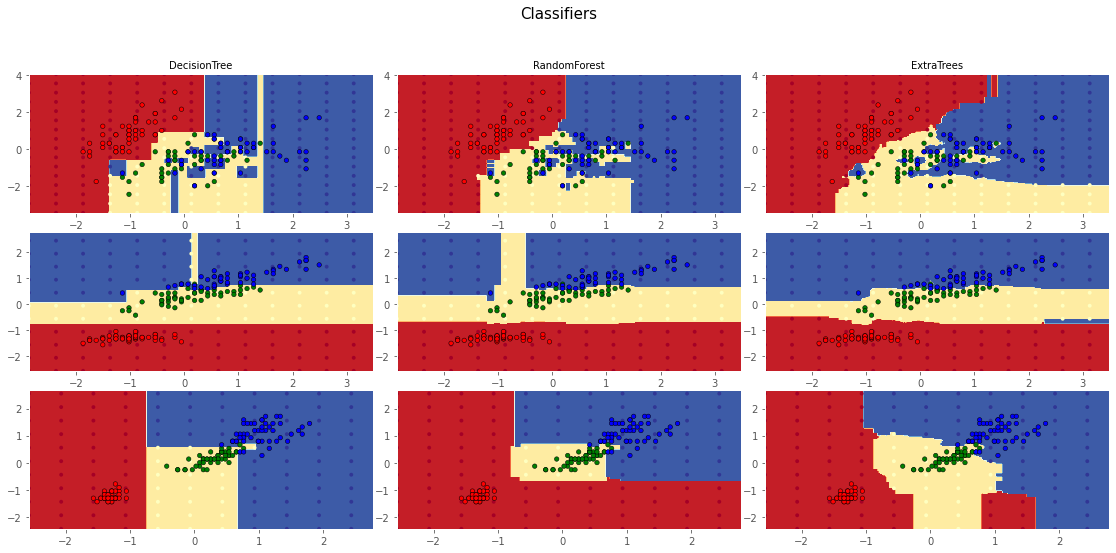

In [45]:
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in ([0,1], [0,2], [2,3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        X, y = X[idx], y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=15)
        
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors='none')
        
        plt.scatter(X[:,0], X[:,1], c=y,
                    cmap=ListedColormap(['r','g','b']),
                    edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Classifiers', fontsize=20)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

In [114]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2531206514.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2531206514.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2531206514.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2531206514.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_8956/2531206514.py:43: UserWarning: The following kwargs were not used by contour: 'estimator'
  cs = plt.contourf(xx, 

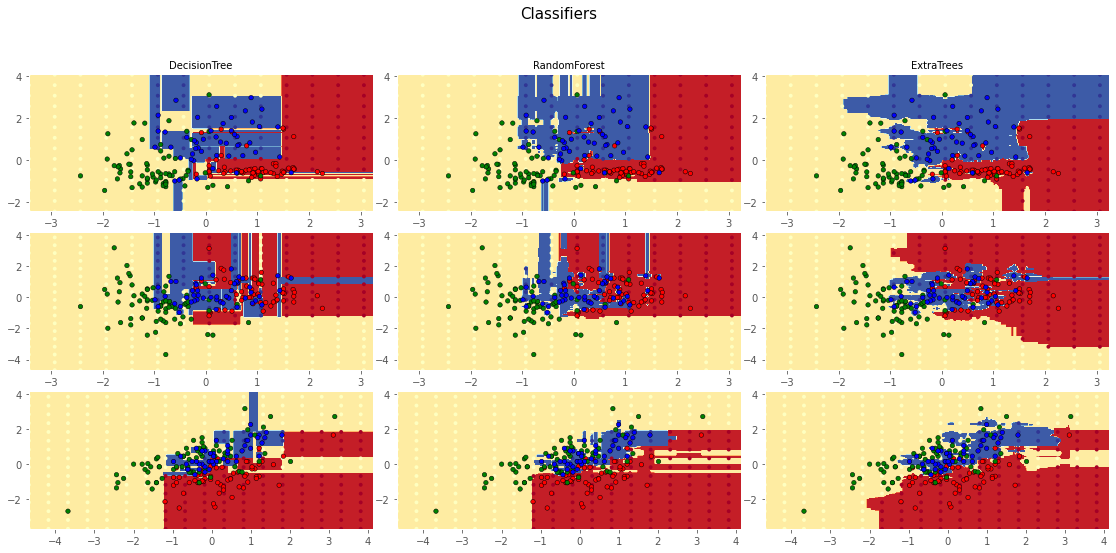

In [46]:
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in ([0,1], [0,2], [2,3]):
    for model in models:
        X = wine.data[:, pair]
        y = wine.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        X, y = X[idx], y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=15)
        
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, estimator=estimator_alpha, cmap=cmap)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors='none')
        
        plt.scatter(X[:,0], X[:,1], c=y,
                    cmap=ListedColormap(['r','g','b']),
                    edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Classifiers', fontsize=20)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

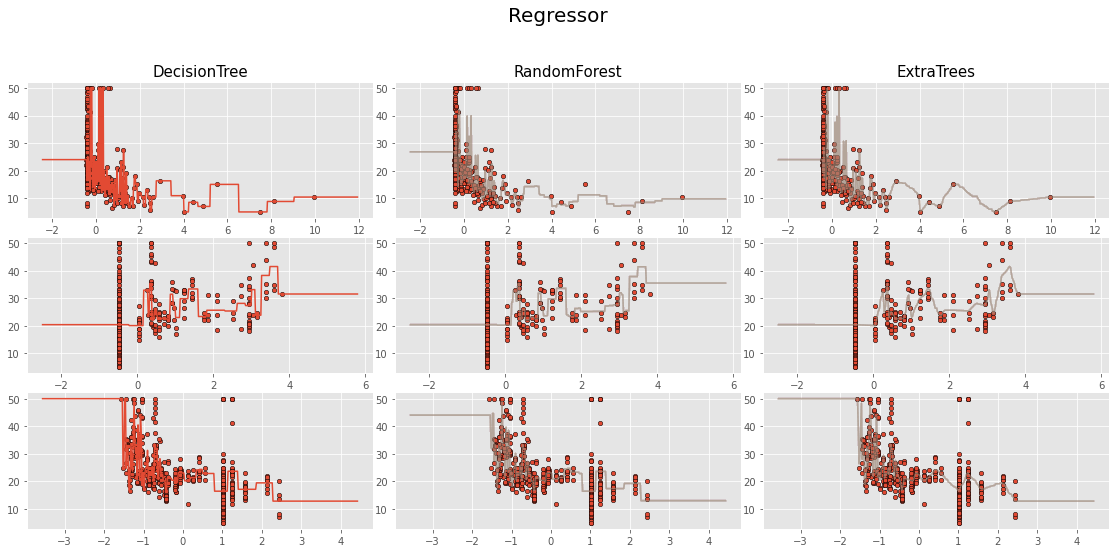

In [47]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in (0,1,2):
    for model in models:
        X = boston.data[:, pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        X, y = X[idx], y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1,1), y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=15)
        
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(xx.reshape(-1,1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                    
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Regressor', fontsize=20)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

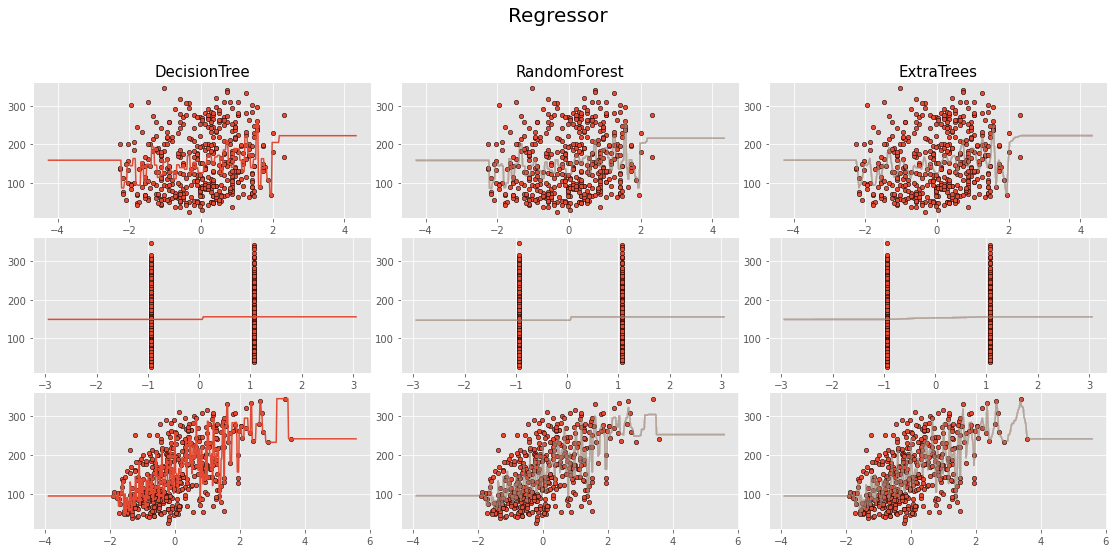

In [115]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in (0,1,2):
    for model in models:
        X = diabetes.data[:, pair]
        y = diabetes.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(random_seed)
        X, y = X[idx], y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1,1), y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]
        
        plt.subplot(3,3,plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=15)
        
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(xx.reshape(-1,1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                    
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle('Regressor', fontsize=20)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

## AdaBoost
+ 대표적인 부스팅 알고리즘
+ 첫 단계에서는 원본 데이터를 학습하고, 그후 반복할 때마다 개별 샘플에 대한 가중치가 수정되고 모델이 재학습
    + 맞게 예측한 샘플은 가중치 감소, 틀리게 예측한 샘플은 가중치 증가  
        => 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

In [49]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

model = make_pipeline(StandardScaler(),
                      AdaBoostClassifier())

iris_base_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('AdaBoostClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

AdaBoostClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.9533 +/= 0.0521
bagging model의 평균 test_score : 0.9533 +/= 0.0521
-----------------------wine-----------------------
   base model의 평균 test_score : 0.8833 +/= 0.1393
bagging model의 평균 test_score : 0.8833 +/= 0.1393
----------------------cancer----------------------
   base model의 평균 test_score : 0.8778 +/= 0.1423
bagging model의 평균 test_score : 0.9631 +/= 0.0277


In [50]:
model = make_pipeline(StandardScaler(),
                      AdaBoostRegressor())

boston_base_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('AdaBoostRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

AdaBoostRegressor
----------------------boston----------------------
   base model의 평균 test_score : 0.4294 +/= 0.3784
bagging model의 평균 test_score : 0.3936 +/= 0.3873
---------------------diabetes---------------------
   base model의 평균 test_score : 0.3986 +/= 0.1218
bagging model의 평균 test_score : 0.4102 +/= 0.0963


## Gradient (Tree) Boosting
+ 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
+ 웹 검색, 분류, 회귀 등 다양한 분야에 모두 사용 가능

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

model = make_pipeline(StandardScaler(),
                      GradientBoostingClassifier())

iris_base_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
iris_bagging_cv = cross_validate(estimator=model,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
wine_bagging_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_base_cv = cross_validate(estimator=model,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_bagging_cv = cross_validate(estimator=model,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('GradientBoostingClassifier')
print('-----------------------iris-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(iris_base_cv['test_score'].mean(),4), round(iris_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(iris_bagging_cv['test_score'].mean(),4), round(iris_bagging_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(wine_base_cv['test_score'].mean(),4), round(wine_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(wine_bagging_cv['test_score'].mean(),4), round(wine_bagging_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(cancer_base_cv['test_score'].mean(),4), round(cancer_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(cancer_bagging_cv['test_score'].mean(),4), round(cancer_bagging_cv['test_score'].std(),4)))

GradientBoostingClassifier
-----------------------iris-----------------------
   base model의 평균 test_score : 0.96 +/= 0.0442
bagging model의 평균 test_score : 0.96 +/= 0.0442
-----------------------wine-----------------------
   base model의 평균 test_score : 0.9216 +/= 0.0752
bagging model의 평균 test_score : 0.9216 +/= 0.0752
----------------------cancer----------------------
   base model의 평균 test_score : 0.916 +/= 0.0793
bagging model의 평균 test_score : 0.9632 +/= 0.0288


In [52]:
model = make_pipeline(StandardScaler(),
                      GradientBoostingRegressor())

boston_base_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
boston_bagging_cv = cross_validate(estimator=model,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_base_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)
diabetes_bagging_cv = cross_validate(estimator=model,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('GradientBoostingRegressor')
print('----------------------boston----------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(boston_base_cv['test_score'].mean(),4), round(boston_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(boston_bagging_cv['test_score'].mean(),4), round(boston_bagging_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('   base model의 평균 test_score : {} +/= {}'.format(round(diabetes_base_cv['test_score'].mean(),4), round(diabetes_base_cv['test_score'].std(),4)))
print('bagging model의 평균 test_score : {} +/= {}'.format(round(diabetes_bagging_cv['test_score'].mean(),4), round(diabetes_bagging_cv['test_score'].std(),4)))

GradientBoostingRegressor
----------------------boston----------------------
   base model의 평균 test_score : 0.4338 +/= 0.5215
bagging model의 평균 test_score : 0.4437 +/= 0.4974
---------------------diabetes---------------------
   base model의 평균 test_score : 0.3731 +/= 0.1234
bagging model의 평균 test_score : 0.3731 +/= 0.1232


## Voting Classifier(투표 기반 분류)
+ 서로 다른 모델들의 결과를 투표를 통해 결합
+ 1. Hard voting : 가장 많이 예측된 클래스를 정답으로 채택
+ 2. Soft voting : 예측된 확률의 가중치 평균

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(estimators=[('svc', model1), ('naive',model2),
                                          ('forest',model3)], voting='hard')

for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=10)
    print(f'{model_name}\nAccuracy : {scores.mean()} +/- {scores.std()}\n')

SVC
Accuracy : 0.9733333333333334 +/- 0.03265986323710904

GaussianNB
Accuracy : 0.9533333333333334 +/- 0.04268749491621898

RandomForestClassifier
Accuracy : 0.96 +/- 0.044221663871405324

VotingClassifier
Accuracy : 0.9666666666666666 +/- 0.033333333333333326



In [123]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

model1 = SVC()
model2 = KNeighborsClassifier()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = ExtraTreesClassifier()
model7 = AdaBoostClassifier()
model8 = GradientBoostingClassifier()
vote_model = VotingClassifier(estimators=[('svc', model1), ('knn',model2), ('naive',model3), 
                                          ('dt',model4),('forest',model5),('ad',model6),
                                          ('et',model7),('gnb', model8)], 
                              voting='soft', weights=[0.5,0.5,1,1,1,1,1,1])

for model in (model1, model2, model3, model4, model5, model6, model7, model8, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, wine.data, wine.target, cv=10)
    print(f'{model_name}\nAccuracy : {scores.mean()} +/- {scores.std()}\n')

SVC
Accuracy : 0.681045751633987 +/- 0.08681008254247198

KNeighborsClassifier
Accuracy : 0.6754901960784313 +/- 0.06990791132962103

GaussianNB
Accuracy : 0.9777777777777779 +/- 0.027216552697590882

DecisionTreeClassifier
Accuracy : 0.8761437908496731 +/- 0.07926369368650263

RandomForestClassifier
Accuracy : 0.9722222222222221 +/- 0.02777777777777779

ExtraTreesClassifier
Accuracy : 0.9833333333333332 +/- 0.035572912430182506

AdaBoostClassifier
Accuracy : 0.8833333333333332 +/- 0.1393326244887161

GradientBoostingClassifier
Accuracy : 0.9160130718954248 +/- 0.07932564791858049



C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_sco

VotingClassifier
Accuracy : nan +/- nan



C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_sco

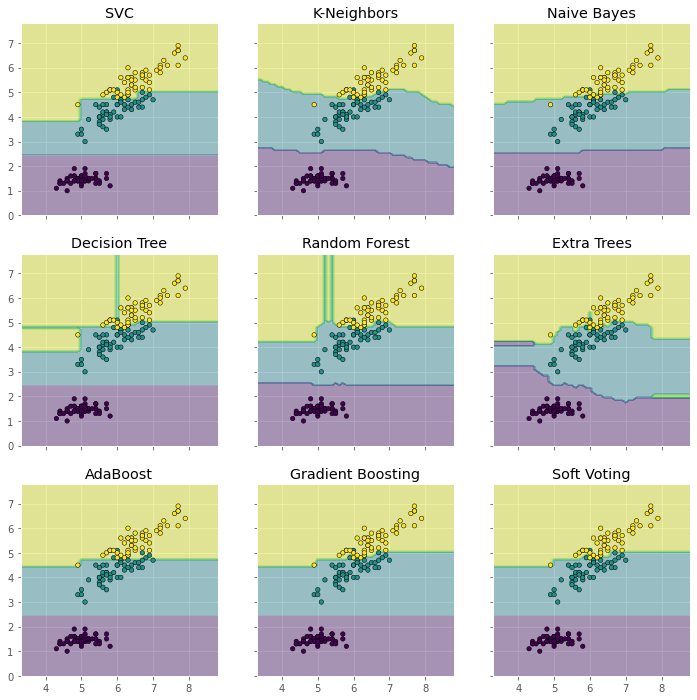

In [87]:
from itertools import product

X = iris.data[:, [0,2]]
y = iris.target

model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('svc', model1), ('knn',model2), ('naive',model3), 
                                          ('dt',model4),('forest',model5),('ad',model6),
                                          ('et',model7),('gnb', model8)],
                              voting='soft', weights=[0.5,0.5,1,1,1,1,1,1])  #estimator 개수에 맞게 가중치 부여

model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
model4.fit(X, y)
model5.fit(X, y)
model6.fit(X, y)
model7.fit(X, y)
model8.fit(X, y)
vote_model.fit(X, y)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))

for idx, model, tt in zip(product([0,1,2],[0,1,2]),
                          [model1, model2, model3, model4, model5, model6, model7, model8, vote_model],
                          ['SVC','K-Neighbors','Naive Bayes',
                           'Decision Tree','Random Forest','Extra Trees',
                           'AdaBoost','Gradient Boosting', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Voting Regressor(투표 기반 회귀)
+ 서로 다른 모델의 예측값들의 평균 채택

In [127]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

model1 = SVR()
model2 = KNeighborsRegressor()
model3 = LinearRegression()
model4 = DecisionTreeRegressor()
model5 = RandomForestRegressor()
model6 = ExtraTreesRegressor()
model7 = AdaBoostRegressor()
model8 = GradientBoostingRegressor()
vote_model = VotingRegressor(estimators=[('svc', model1), ('knn',model2), ('linear',model3), 
                                          ('dt',model4),('forest',model5),('ad',model6),
                                          ('et',model7),('gnb', model8)], 
                            weights=[1,1,1,2,1,2,2,1])

for model in (model1, model2, model3, model4, model5, model6, model7, model8, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, wine.data, wine.target, cv=10)
    print(f'{model_name}\nAccuracy : {scores.mean()} +/- {scores.std()}\n')

SVR
Accuracy : -0.24597113705567208 +/- 1.0589358995712235

KNeighborsRegressor
Accuracy : -0.018413186813186776 +/- 0.30731245906909516

LinearRegression
Accuracy : 0.05874033256464005 +/- 0.1614723843028185

DecisionTreeRegressor
Accuracy : 0.4481868131868132 +/- 0.4681468326814182

RandomForestRegressor
Accuracy : 0.027771796703296703 +/- 0.22162922324007356

ExtraTreesRegressor
Accuracy : 0.10402607692307693 +/- 0.2093270310672701

AdaBoostRegressor
Accuracy : 0.24557261264255592 +/- 0.44623509547721607

GradientBoostingRegressor
Accuracy : 0.05874106094455992 +/- 0.17928256549417873

VotingRegressor
Accuracy : 0.08831884954416631 +/- 0.23641210023416667



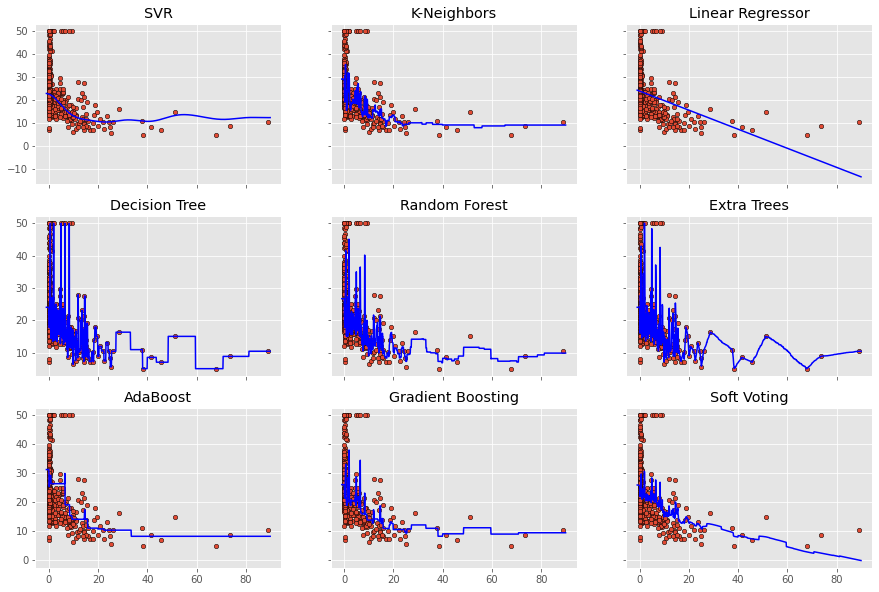

In [104]:
X = boston.data[:, 0].reshape(-1,1)
y = boston.target

model1 = SVR()
model2 = KNeighborsRegressor()
model3 = LinearRegression()
model4 = DecisionTreeRegressor()
model5 = RandomForestRegressor()
model6 = ExtraTreesRegressor()
model7 = AdaBoostRegressor()
model8 = GradientBoostingRegressor()
vote_model = VotingRegressor(estimators=[('svc', model1), ('knn',model2), ('linear',model3), 
                                          ('dt',model4),('forest',model5),('ad',model6),
                                          ('et',model7),('gnb', model8)], 
                            weights=[1,1,8,2,1,1,3,1])

model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
model4.fit(X, y)
model5.fit(X, y)
model6.fit(X, y)
model7.fit(X, y)
model8.fit(X, y)
vote_model.fit(X, y)

x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min, x_max, 0.1)

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15,10))

for idx, model, title in zip(product([0,1,2],[0,1,2]),
                          [model1, model2, model3, model4, model5, model6, model7, model8, vote_model],
                          ['SVR','K-Neighbors','Linear Regressor',
                           'Decision Tree','Random Forest','Extra Trees',
                           'AdaBoost','Gradient Boosting', 'Soft Voting']):
    Z = model.predict(xx.reshape(-1,1))
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='b')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(title)

plt.show()

## Stacked Generalization(스택 일반화)
+ 각 모델의 예측값을 최종 모델의 입력으로 사용
+ 모델의 편향을 줄이는 데 효과적

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [('logistic',LogisticRegression()),
              ('naive',GaussianNB()),
              ('svc',SVC())]

clf = StackingClassifier(estimators=estimators,
                         final_estimator=RandomForestClassifier())

iris_reg_cv = cross_validate(estimator=clf,
                              X=iris.data, y=iris.target,
                              cv=10)
wine_reg_cv = cross_validate(estimator=clf,
                              X=wine.data, y=wine.target,
                              cv=10)
cancer_reg_cv = cross_validate(estimator=clf,
                              X=cancer.data, y=cancer.target,
                              cv=10)

print('StackingClassifier')
print('-----------------------iris-----------------------')
print('model의 평균 test_score : {} +/= {}'.format(round(iris_reg_cv['test_score'].mean(),4), round(iris_reg_cv['test_score'].std(),4)))
print('-----------------------wine-----------------------')
print('model의 평균 test_score : {} +/= {}'.format(round(wine_reg_cv['test_score'].mean(),4), round(wine_reg_cv['test_score'].std(),4)))
print('----------------------cancer----------------------')
print('model의 평균 test_score : {} +/= {}'.format(round(cancer_reg_cv['test_score'].mean(),4), round(cancer_reg_cv['test_score'].std(),4)))

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

StackingClassifier
-----------------------iris-----------------------
model의 평균 test_score : 0.96 +/= 0.0327
-----------------------wine-----------------------
model의 평균 test_score : 0.9833 +/= 0.0255
----------------------cancer----------------------
model의 평균 test_score : 0.9579 +/= 0.0224


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


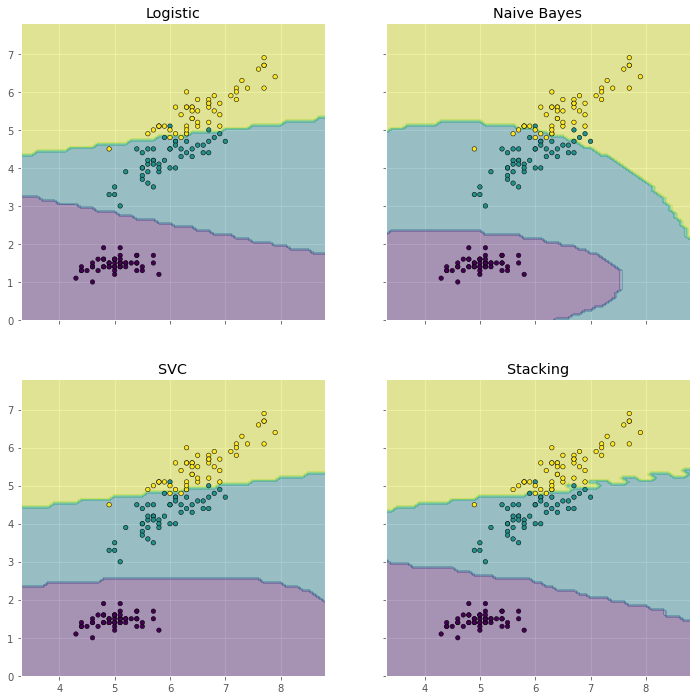

In [113]:
X, y = iris.data[:,[0,2]], iris.target 
model1 = LogisticRegression(max_iter=1000)
model2 = GaussianNB()
model3 = SVC()
stack = StackingClassifier(estimators=estimators,
                          final_estimator=RandomForestClassifier())

model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
stack.fit(X, y)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,12))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic', 'Naive Bayes', 'SVC', 'Stacking']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [108]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor

estimators = [('ridge',Ridge()),
              ('lasso',Lasso()),
              ('svr',SVR())]

reg = make_pipeline(StandardScaler(),
                    StackingRegressor(estimators=estimators,
                                      final_estimator=GradientBoostingRegressor()))

boston_reg_cv = cross_validate(estimator=reg,
                              X=boston.data, y=boston.target,
                              cv=10)
diabetes_reg_cv = cross_validate(estimator=reg,
                              X=diabetes.data, y=diabetes.target,
                              cv=10)

print('StackingRegressor')
print('----------------------boston----------------------')
print('    model의 평균 test_score : {} +/= {}'.format(round(boston_reg_cv['test_score'].mean(),4), round(boston_reg_cv['test_score'].std(),4)))
print('---------------------diabetes---------------------')
print('    model의 평균 test_score : {} +/= {}'.format(round(diabetes_reg_cv['test_score'].mean(),4), round(diabetes_reg_cv['test_score'].std(),4)))

StackingRegressor
----------------------boston----------------------
    model의 평균 test_score : 0.1439 +/= 0.7241
---------------------diabetes---------------------
    model의 평균 test_score : 0.3878 +/= 0.1371


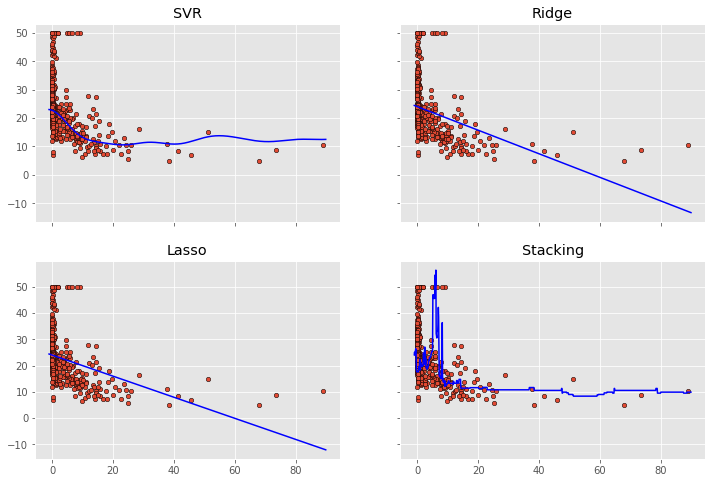

In [110]:
X, y = boston.data[:,0].reshape(-1,1), boston.target 
model1 = SVR()
model2 = Ridge()
model3 = Lasso()
reg = make_pipeline(StandardScaler(),
                    StackingRegressor(estimators=estimators,
                                      final_estimator=GradientBoostingRegressor()))

model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
reg.fit(X, y)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, title in zip(product([0,1],[0,1]),
                          [model1, model2, model3, reg],
                          ['SVR', 'Ridge', 'Lasso', 'Stacking']):
    Z = model.predict(xx.reshape(-1,1))
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='b')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(title)

plt.show()